In [1]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from msresist.RNAseq import preprocess_AXL_RNAseq_data, filter_by_EvEAvar
from msresist.pca import plotPCA_scoresORloadings
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

matplotlib.rcParams['font.sans-serif'] = "Arial"
sns.set(style="whitegrid", font_scale=1, color_codes=True, palette="colorblind", rc={"grid.linestyle": "dotted", "axes.linewidth": 0.6})

In [2]:
df = pd.read_csv("/home/marcc/AXLomics/msresist/data/Validations/Luminex/120522-YAPKO_E_EA.csv")
d = df[df["Analyte"] != "total protein"]
d["Abundance"] = np.log(d["Abundance"])
d.insert(0, "Condition", [s + " " + z for s, z in list(zip(list(d["Cell Line"]), list(d["Treatment"])))])

/tmp/ipykernel_770925/1109574114.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d["Abundance"] = np.log(d["Abundance"])


/home/marcc/.local/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:blue'` for same effect.
  warnings.warn(msg, FutureWarning)


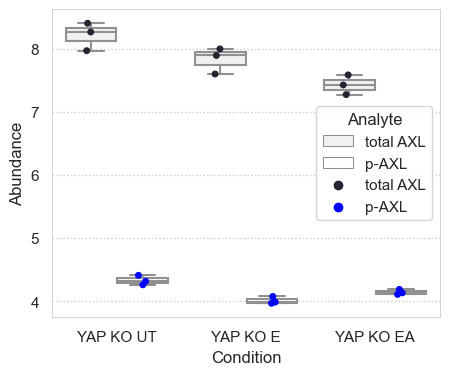

In [14]:
_, ax = plt.subplots(1, 1, figsize=(5, 4))
sns.boxplot(d[d["Cell Line"] == "YAP KO"], x="Condition", hue="Analyte", y="Abundance", ax=ax, dodge=True, color="white")
sns.stripplot(d[d["Cell Line"] == "YAP KO"], x="Condition", hue="Analyte", y="Abundance", ax=ax, dodge=True, color="blue")
plt.savefig("YAPKO.svg")

In [44]:
rna_f = preprocess_AXL_RNAseq_data()

/home/marcc/AXLomics/msresist/RNAseq.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rna_f.iloc[:, 2:] = pd.DataFrame(StandardScaler().fit_transform(rna_f.iloc[:, 2:]))


In [48]:
rna_f

,Cell Lines,Treatment,GPX1,PKD1L2,ENST00000622053.4,IGLV5-52,IGLV1-51,ENST00000631600.1,ENST00000633209.1,ENST00000631840.1,...,AC003072.1,AC141557.1,AC141557.2,AC245100.3,AC090114.3,AC139769.3,AC112907.2,AL450124.1,PMS2P6,FRG1BP
0,KD,E,-0.952666,1.111373,-0.860961,-1.444459,0.460198,-0.249840,-0.721926,-0.991095,...,-0.201373,-0.781397,-1.066259,-0.246329,-0.758438,0.295438,-1.015461,1.061606,-0.035939,0.908061
1,KD,EA,-0.804980,0.787675,-0.840119,0.859360,-0.110828,-0.617766,-0.721926,-0.736663,...,0.765147,-1.133929,-0.936368,-1.087640,0.488475,0.931416,0.231582,0.245118,0.079962,0.413106
2,KD,UT,0.962249,-1.448027,1.385117,-0.436639,-1.448326,0.798874,3.233567,1.505322,...,-1.425268,0.301589,-0.145186,0.609771,-1.348586,-1.273939,0.614141,-1.127491,-0.455856,-1.146500
3,KI,E,0.180572,0.851830,-0.608375,-0.146834,-1.070584,-0.567168,0.491359,-0.991095,...,-0.350175,-0.683944,-1.076752,-1.373632,-0.414842,-0.893167,-1.381813,0.642248,0.301239,-0.638862
4,KI,EA,-0.831976,0.656814,-0.748983,-0.849833,-1.146700,-0.608595,-0.721926,-0.729348,...,0.646062,-0.055274,-0.913865,0.195588,-0.062223,0.858279,-0.301275,0.603356,0.190922,0.671648
5,KI,UT,0.307655,-1.299173,1.436705,0.049075,0.325956,1.242595,-0.324254,-0.391296,...,-0.946315,0.243061,-0.263991,-0.376657,-0.715147,1.243790,0.658434,-1.421723,-0.394118,-1.543497
6,KO,E,0.245796,1.369108,-0.832326,0.571617,0.042593,-0.903282,-0.721926,-0.056118,...,-0.198151,-0.928245,-1.000983,2.142040,-0.739527,1.179667,-0.417754,1.152630,0.295447,0.426588
7,KO,UT,1.435924,-1.030940,1.104407,-2.235211,-1.249207,0.605812,0.378366,0.034075,...,-1.195726,-0.390009,-0.253628,0.651583,-0.403316,-0.379647,0.616440,-1.493224,-1.741392,-1.693119
8,Y726F,E,-0.619947,0.218851,-0.881863,0.085337,0.358210,-0.903282,-0.721926,-0.710084,...,1.145069,-0.318019,0.081984,-0.654419,0.496735,-0.643467,0.207009,0.909654,-0.632961,-0.736332
9,Y726F,EA,-0.955099,0.433419,-0.666333,0.213432,-0.380440,-0.617796,-0.721926,-0.991095,...,0.988511,-0.751907,-0.557238,-1.161726,-1.339090,-0.030193,-0.173334,0.976740,-1.254310,0.817992


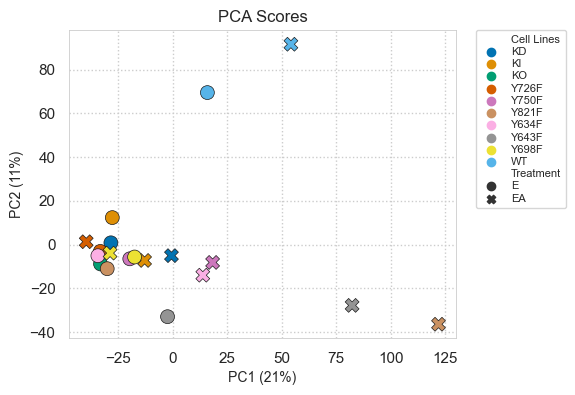

In [55]:
_, ax = plt.subplots(1, 1, figsize=(5, 4))
plotPCA_scoresORloadings(ax, rna_fEA[(rna_fEA["Treatment"] != "UT")], 2, ["Cell Lines", "Treatment"], hue_scores="Cell Lines", style_scores="Treatment", legendOut=True, plot="scores")

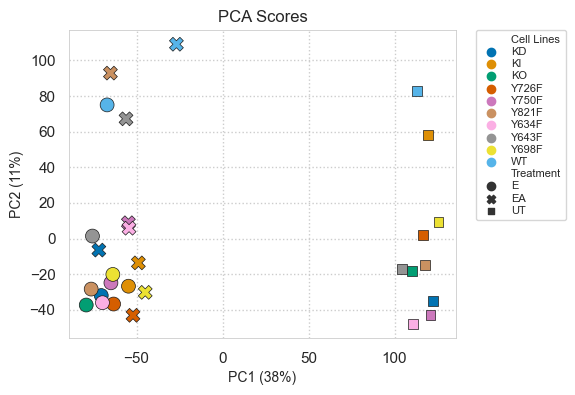

In [53]:
_, ax = plt.subplots(1, 1, figsize=(5, 4))
plotPCA_scoresORloadings(ax, rna_f, 2, ["Cell Lines", "Treatment"], hue_scores="Cell Lines", style_scores="Treatment", legendOut=True, plot="scores")

/tmp/ipykernel_648617/3034969102.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  rna_fEA.iloc[:, 2:] = rna_fEA.iloc[:, 2:].astype(float)


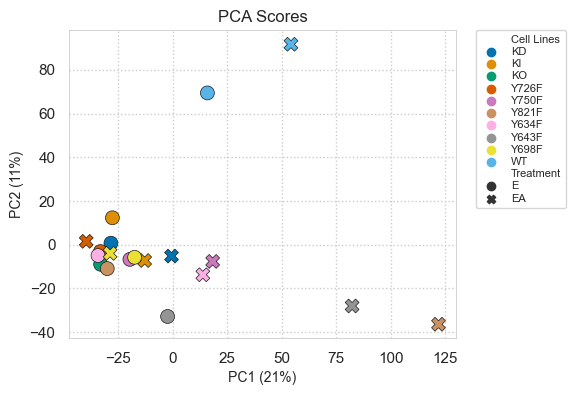

In [25]:
rna_fEA = filter_by_EvEAvar(rna_f, savefig=False, perCut=50).T
rna_fEA.insert(0, "Cell Lines", [s.split("-")[0] for s in rna_fEA.index])
rna_fEA.insert(1, "Treatment", [s.split("-")[1] for s in rna_fEA.index])
rna_fEA.index = range(rna_fEA.shape[0])
rna_fEA.iloc[:, 2:] = rna_fEA.iloc[:, 2:].astype(float)
_, ax = plt.subplots(1, 1, figsize=(5, 4))
plotPCA_scoresORloadings(ax, rna_fEA, 2, ["Cell Lines", "Treatment"], hue_scores="Cell Lines", style_scores="Treatment", legendOut=True, plot="scores")